In [36]:
from ipywidgets import interact
from fastai.basics import *
from tqdm.notebook import tqdm

In [22]:
x= torch.linspace(-2,2, 100)
def plot_function(fn,min=-2.1,max=2.1, color='r',title=None):
    x = torch.linspace(min,max, 100)
    plt.scatter(x,fn(x=x),color=color)
    if title:
        plt.title(title)
    plt.show()



In [3]:
def quadratic(a,b,c, x): return a*x**2+b*x+c
def mk_quadratic(a,b,c): return partial(quadratic, a=a, b=b, c= c)

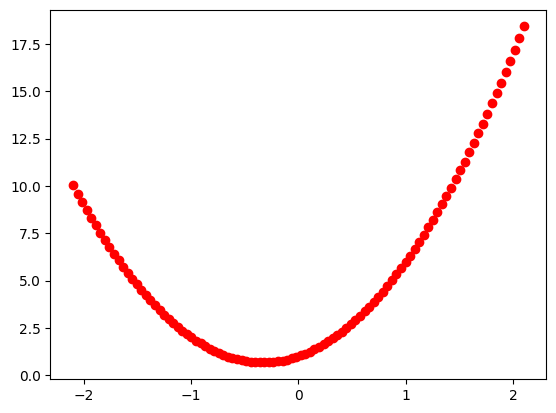

In [8]:
f2 = mk_quadratic(3,2,1)
plot_function(f2)


In [ ]:
@interact(a=(-5.,5.), b=(-5.,5.), c=(-5.,5.))
def show_quadratic(a=1.0, b=0.0, c=0.0):
	plt.scatter(x,add_noise(f2(x=x),0.5,0.5))
	plot_function(mk_quadratic(a, b, c))

interactive(children=(FloatSlider(value=1.0, description='a', max=5.0, min=-5.0), FloatSlider(value=0.0, descr…

In [6]:
def noise(x, scale): return np.random.normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): return x * (1+noise(x,mult)) + noise(x,add)

In [18]:
torch.abs(torch.tensor([4,2,3]) - torch.tensor([1,2,3]))

tensor([3, 0, 0])

In [27]:
y=add_noise(f2(x=x),0.5,0.5)
@interact(a=(-5.,5.), b=(-5.,5.), c=(-5.,5.))
def show_quadratic(a=1.0, b=0.0, c=0.0):
    plt.scatter(x,y)
    dynamic_f=mk_quadratic(a, b, c)
    y_pred=dynamic_f(x=x)
    mean_abs_error=torch.abs(y-y_pred).mean()
    title=f'MAE: {mean_abs_error:.2f}'
    plot_function(dynamic_f,title=title)

C:\Users\schitta\AppData\Local\Temp\ipykernel_6808\1958766108.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  def add_noise(x, mult, add): return x * (1+noise(x,mult)) + noise(x,add)


interactive(children=(FloatSlider(value=1.0, description='a', max=5.0, min=-5.0), FloatSlider(value=0.0, descr…

## gradient section.

In [28]:
params=torch.tensor([1.,2.,3.], requires_grad=True)

In [29]:
# get params to a,b,c
a,b,c = params
dynamic_f=mk_quadratic(a, b, c)
y_pred=dynamic_f(x=x)
mean_abs_error=torch.abs(y-y_pred).mean()
print(f'MAE: {mean_abs_error:.2f}')

MAE: 2.93


In [30]:
mean_abs_error.backward()

In [31]:
# update params using gradient descent
params.data -= 0.1 * params.grad.data
# zero the gradients after updating
params.grad.data.zero_()


tensor([0., 0., 0.])

In [32]:
# get params to a,b,c
a,b,c = params
dynamic_f=mk_quadratic(a, b, c)
y_pred=dynamic_f(x=x)
mean_abs_error=torch.abs(y-y_pred).mean()
print(f'MAE: {mean_abs_error:.2f}')

MAE: 2.90


In [33]:
a,b,c

(tensor(1.0494, grad_fn=<UnbindBackward0>),
 tensor(1.9955, grad_fn=<UnbindBackward0>),
 tensor(2.9820, grad_fn=<UnbindBackward0>))

In [38]:
params

<function fastai.torch_core.params(m)>

In [39]:
params=torch.tensor([1.,2.,3.], requires_grad=True)
print(f'type of params {type(params)}')
# loop for 100 iterations to see the error decrease. can you add a progress bar using tqdm? 
for i in tqdm(range(100)):
    # get params to a,b,c
    a,b,c = params
    dynamic_f=mk_quadratic(a, b, c)
    y_pred=dynamic_f(x=x)
    mean_abs_error=torch.abs(y-y_pred).mean()
    print(f'iteration {i}: MAE: {mean_abs_error:.2f}')
    mean_abs_error.backward()
    # update params using gradient descent
    params.data -= 0.1 * params.grad.data
    # zero the gradients after updating
    params.grad.data.zero_()

type of params <class 'torch.Tensor'>


  0%|          | 0/100 [00:00<?, ?it/s]

iteration 0: MAE: 2.93
iteration 1: MAE: 2.90
iteration 2: MAE: 2.87
iteration 3: MAE: 2.85
iteration 4: MAE: 2.82
iteration 5: MAE: 2.79
iteration 6: MAE: 2.77
iteration 7: MAE: 2.74
iteration 8: MAE: 2.72
iteration 9: MAE: 2.69
iteration 10: MAE: 2.67
iteration 11: MAE: 2.65
iteration 12: MAE: 2.62
iteration 13: MAE: 2.61
iteration 14: MAE: 2.59
iteration 15: MAE: 2.57
iteration 16: MAE: 2.56
iteration 17: MAE: 2.54
iteration 18: MAE: 2.52
iteration 19: MAE: 2.51
iteration 20: MAE: 2.49
iteration 21: MAE: 2.48
iteration 22: MAE: 2.46
iteration 23: MAE: 2.45
iteration 24: MAE: 2.43
iteration 25: MAE: 2.42
iteration 26: MAE: 2.40
iteration 27: MAE: 2.39
iteration 28: MAE: 2.38
iteration 29: MAE: 2.37
iteration 30: MAE: 2.36
iteration 31: MAE: 2.35
iteration 32: MAE: 2.34
iteration 33: MAE: 2.33
iteration 34: MAE: 2.32
iteration 35: MAE: 2.31
iteration 36: MAE: 2.30
iteration 37: MAE: 2.29
iteration 38: MAE: 2.29
iteration 39: MAE: 2.28
iteration 40: MAE: 2.27
iteration 41: MAE: 2.26
it

In [44]:
params=torch.tensor([1.,2.,3.], requires_grad=True)
print(f'type of params {type(params)}')
# loop for 100 iterations to see the error decrease. can you add a progress bar using tqdm? 
for i in tqdm(range(100)):
    # get params to a,b,c
    dynamic_f=mk_quadratic(params[0], params[1], params[2])
    y_pred=dynamic_f(x=x)
    mean_abs_error=torch.abs(y-y_pred).mean()
    print(f'iteration {i}: MAE: {mean_abs_error:.2f}')
    mean_abs_error.backward()
    # update params using gradient descent
    with torch.no_grad(): params -= params.grad*0.01 
    # zero the gradients after updating
    params.grad.zero_()

type of params <class 'torch.Tensor'>


  0%|          | 0/100 [00:00<?, ?it/s]

iteration 0: MAE: 2.93
iteration 1: MAE: 2.93
iteration 2: MAE: 2.92
iteration 3: MAE: 2.92
iteration 4: MAE: 2.92
iteration 5: MAE: 2.92
iteration 6: MAE: 2.91
iteration 7: MAE: 2.91
iteration 8: MAE: 2.91
iteration 9: MAE: 2.90
iteration 10: MAE: 2.90
iteration 11: MAE: 2.90
iteration 12: MAE: 2.90
iteration 13: MAE: 2.89
iteration 14: MAE: 2.89
iteration 15: MAE: 2.89
iteration 16: MAE: 2.88
iteration 17: MAE: 2.88
iteration 18: MAE: 2.88
iteration 19: MAE: 2.88
iteration 20: MAE: 2.87
iteration 21: MAE: 2.87
iteration 22: MAE: 2.87
iteration 23: MAE: 2.87
iteration 24: MAE: 2.86
iteration 25: MAE: 2.86
iteration 26: MAE: 2.86
iteration 27: MAE: 2.85
iteration 28: MAE: 2.85
iteration 29: MAE: 2.85
iteration 30: MAE: 2.85
iteration 31: MAE: 2.84
iteration 32: MAE: 2.84
iteration 33: MAE: 2.84
iteration 34: MAE: 2.83
iteration 35: MAE: 2.83
iteration 36: MAE: 2.83
iteration 37: MAE: 2.83
iteration 38: MAE: 2.82
iteration 39: MAE: 2.82
iteration 40: MAE: 2.82
iteration 41: MAE: 2.81
it

In [45]:
params

tensor([1.4708, 1.9713, 2.8086], requires_grad=True)

In [46]:
params.grad

tensor([0., 0., 0.])

In [ ]:
def rectified_linear(m,b, x): 
    y=m*x+b
    return torch.clip(y,0)

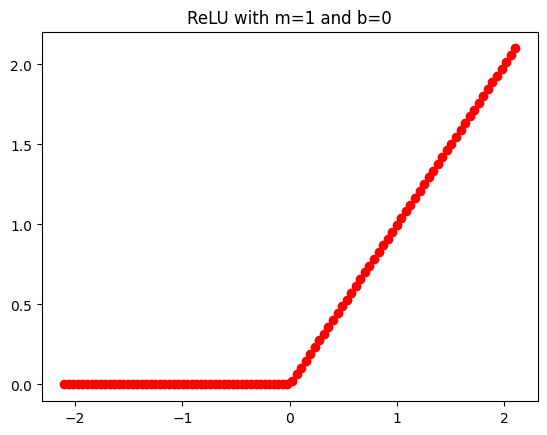

In [48]:
plot_function(partial(rectified_linear, m=1, b=0), title='ReLU with m=1 and b=0')

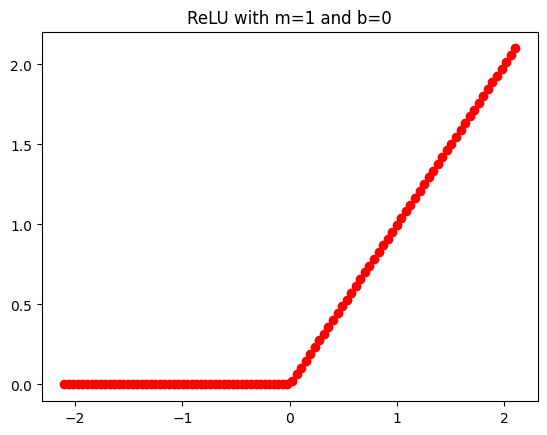

In [51]:
import torch.nn.functional as F
def rectified_linear2(m,b,x): return F.relu(m*x+b)
plot_function(partial(rectified_linear2, 1,0), title='ReLU with m=1 and b=0')

In [53]:
@interact(m=1.5, b=1.5)
def plot_relu(m, b):
    plot_function(partial(rectified_linear, m,b))

interactive(children=(FloatSlider(value=1.5, description='m', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

In [56]:
def double_relu(m1,b1,m2,b2,x):
    return rectified_linear(m1,b1,x) + rectified_linear(m2,b2,x)

@interact(m1=-1.5, b1=-1.5, m2=1.5, b2=1.5)
def plot_double_relu(m1, b1, m2, b2):
    plot_function(partial(double_relu, m1,b1,m2,b2))

interactive(children=(FloatSlider(value=-1.5, description='m1', max=1.5, min=-4.5), FloatSlider(value=-1.5, de…

In [57]:
def triple_relu(m1,b1,m2,b2,m3,b3,x):
    return rectified_linear(m1,b1,x) + rectified_linear(m2,b2,x) + rectified_linear(m3,b3,x)

@interact(m1=-1.5, b1=-1.5, m2=1.5, b2=1.5, m3=-1.5, b3=-1.5)
def plot_triple_relu(m1, b1, m2, b2, m3, b3):
    plot_function(partial(triple_relu, m1,b1,m2,b2,m3,b3))

interactive(children=(FloatSlider(value=-1.5, description='m1', max=1.5, min=-4.5), FloatSlider(value=-1.5, de…